<a href="https://colab.research.google.com/github/qa21336/HousingStatisticsAnalysis-/blob/main/UK_HPI_mountDrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#imports
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ADS Datasets/UK-HPI-full-file-2023-12.csv")

In [4]:
df.head()

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,NaN,NaN,388.0,...,88436.13953,40.267250,NaN,NaN,103.0,81043.95084,40.883367,NaN,NaN,285.0
1,01/02/2004,Aberdeenshire,S12000034,81678.76231,40.856757,NaN,-0.018248,NaN,NaN,326.0,...,88606.44649,40.344795,0.192576,NaN,107.0,80965.29542,40.843688,-0.097053,NaN,219.0
2,01/03/2004,Aberdeenshire,S12000034,83525.09702,41.780317,NaN,2.260483,NaN,NaN,453.0,...,90296.91375,41.114508,1.907838,NaN,140.0,82903.23948,41.821302,2.393549,NaN,313.0
3,01/04/2004,Aberdeenshire,S12000034,84333.67900,42.184780,NaN,0.968071,NaN,NaN,571.0,...,90319.87844,41.124964,0.025432,NaN,180.0,84003.99161,42.376586,1.327755,NaN,391.0
4,01/05/2004,Aberdeenshire,S12000034,86379.95396,43.208353,NaN,2.426403,NaN,NaN,502.0,...,91989.17763,41.885039,1.848208,NaN,167.0,86222.73484,43.495852,2.641235,NaN,335.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139365 entries, 0 to 139364
Data columns (total 54 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    139365 non-null  object 
 1   RegionName              139365 non-null  object 
 2   AreaCode                139365 non-null  object 
 3   AveragePrice            139365 non-null  float64
 4   Index                   139365 non-null  float64
 5   IndexSA                 4884 non-null    float64
 6   1m%Change               138941 non-null  float64
 7   12m%Change              134553 non-null  float64
 8   AveragePriceSA          4884 non-null    float64
 9   SalesVolume             134898 non-null  float64
 10  DetachedPrice           132852 non-null  float64
 11  DetachedIndex           132852 non-null  float64
 12  Detached1m%Change       132462 non-null  float64
 13  Detached12m%Change      128196 non-null  float64
 14  SemiDetachedPrice   

In [6]:
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")

In [7]:
df = df.drop(['IndexSA', 'AveragePriceSA'], axis=1)

In [8]:
def area_code_to_country(area_code):
    if area_code.startswith("E"):
        return "England"
    elif area_code.startswith("W"):
        return "Wales"
    elif area_code.startswith("S"):
        return "Scotland"
    elif area_code.startswith("N"):
        return "Northern Ireland"
    elif area_code.startswith("K"):
        return "England + Wales"
    else:
        return "Unknown"

In [9]:
# Adds a new column named "Country" to df
df["Country"] = df["AreaCode"].apply(area_code_to_country)

In [10]:
df_grouped = {group: data for group, data in df.groupby("Country")}

In [11]:
england_df = df_grouped["England"].reset_index()
wales_df = df_grouped["Wales"].reset_index()
scotland_df = df_grouped["Scotland"].reset_index()
northern_ireland_df = df_grouped["Northern Ireland"].reset_index()
england_wales_df = df_grouped["England + Wales"].reset_index()

In [12]:
print(len(england_df))
print(len(wales_df))
print(len(scotland_df))
print(len(northern_ireland_df))
print(len(england_wales_df))

118257
8325
8349
3177
1257


In [13]:
england_df

,index,Date,RegionName,AreaCode,AveragePrice,Index,1m%Change,12m%Change,SalesVolume,DetachedPrice,...,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume,Country
0,240,1995-01-01,Adur,E07000223,54516.42545,21.836620,NaN,NaN,79.0,85482.01252,...,22.378461,NaN,NaN,11.0,54372.37389,21.788639,NaN,NaN,68.0,England
1,241,1995-02-01,Adur,E07000223,55708.33312,22.314040,2.186328,NaN,69.0,86608.15652,...,22.906624,2.360142,NaN,5.0,55557.42782,22.263526,2.179515,NaN,64.0,England
2,242,1995-03-01,Adur,E07000223,55724.54586,22.320534,0.029103,NaN,103.0,86386.66096,...,22.975061,0.298764,NaN,5.0,55567.73779,22.267657,0.018557,NaN,98.0,England
3,243,1995-04-01,Adur,E07000223,55440.83646,22.206894,-0.509128,NaN,84.0,85566.09671,...,22.837862,-0.597163,NaN,2.0,55286.75938,22.155061,-0.505650,NaN,82.0,England
4,244,1995-05-01,Adur,E07000223,53334.35175,21.363139,-3.799518,NaN,77.0,82340.96480,...,21.982376,-3.745912,NaN,5.0,53184.96713,21.312810,-3.801620,NaN,72.0,England
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118252,139360,2023-08-01,Yorkshire and The Humber,E12000003,211911.00000,155.600000,1.600000,1.5,5227.0,349764.00000,...,185.100000,9.800000,15.7,27.0,206545.00000,153.900000,1.300000,0.9,5200.0,England
118253,139361,2023-09-01,Yorkshire and The Humber,E12000003,207500.00000,152.400000,-2.100000,-1.3,4807.0,341214.00000,...,172.700000,-6.700000,5.0,30.0,202675.00000,151.000000,-1.900000,-1.6,4777.0,England
118254,139362,2023-10-01,Yorkshire and The Humber,E12000003,210827.00000,154.800000,1.600000,0.1,3714.0,348066.00000,...,179.000000,3.600000,11.6,18.0,205746.00000,153.300000,1.500000,-0.4,3696.0,England
118255,139363,2023-11-01,Yorkshire and The Humber,E12000003,207212.00000,152.200000,-1.700000,-1.9,NaN,343592.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,England


# Average Price

In [14]:
import matplotlib.pyplot as plt

In [15]:
# Testing
monthly_avg_price = england_df.groupby("Date")
c = [a for a in monthly_avg_price]
d = monthly_avg_price["AveragePrice"]
e = [a for a in d]
e[0]

(Timestamp('1968-04-01 00:00:00'),
 30276     3025.670615
 34110     3408.108064
 57399     4418.489911
 88410     3468.159279
 109611    3328.858802
 117588    2712.015577
 Name: AveragePrice, dtype: float64)

In [16]:
monthly_avg_price_eng = england_df.groupby('Date')["AveragePrice"].mean()
monthly_avg_price_wales = wales_df.groupby('Date')["AveragePrice"].mean()
monthly_avg_price_scot = scotland_df.groupby('Date')["AveragePrice"].mean()
monthly_avg_price_ni = northern_ireland_df.groupby('Date')["AveragePrice"].mean()
monthly_avg_price_e_w = england_wales_df.groupby('Date')["AveragePrice"].mean()


In [17]:
monthly_std_dev_eng = england_df.groupby('Date')["AveragePrice"].std()
monthly_std_dev_wales = wales_df.groupby('Date')["AveragePrice"].std()
monthly_std_dev_scot = scotland_df.groupby('Date')["AveragePrice"].std()
monthly_std_dev_ni = northern_ireland_df.groupby('Date')["AveragePrice"].std()
monthly_std_dev_e_w = england_wales_df.groupby('Date')["AveragePrice"].std()

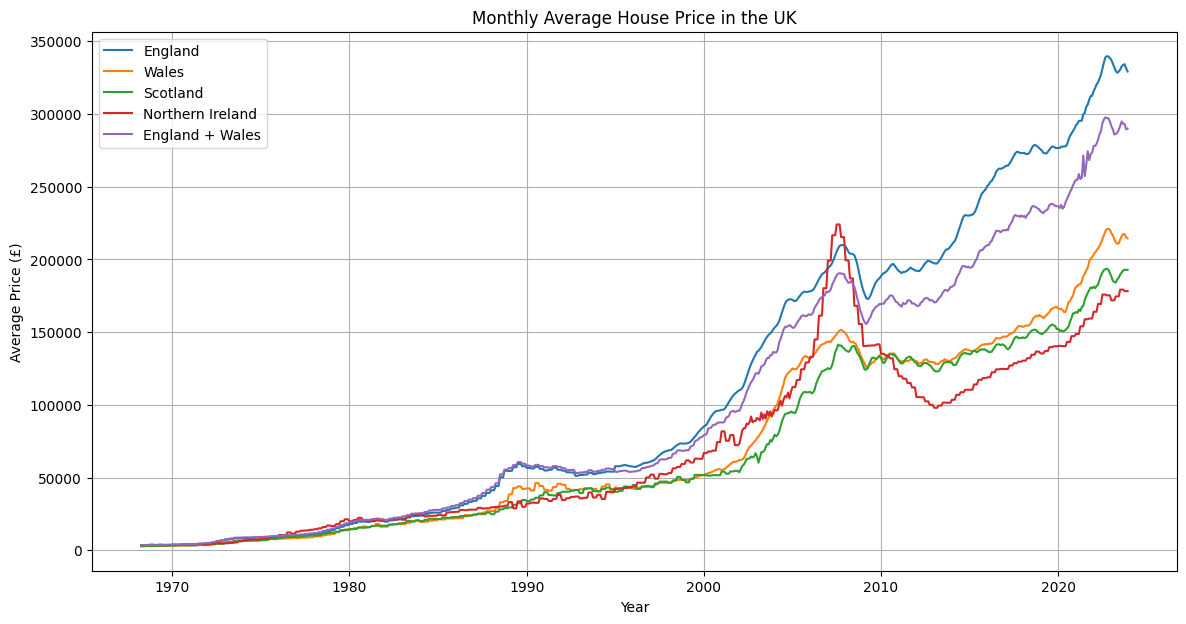

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg_price_eng, label="England")
plt.plot(monthly_avg_price_wales, label="Wales")
plt.plot(monthly_avg_price_scot, label="Scotland")
plt.plot(monthly_avg_price_ni, label="Northern Ireland")
plt.plot(monthly_avg_price_e_w, label="England + Wales")
plt.title("Monthly Average House Price in the UK")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid(True)

plt.show()


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139365 entries, 0 to 139364
Data columns (total 53 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date                    139365 non-null  datetime64[ns]
 1   RegionName              139365 non-null  object        
 2   AreaCode                139365 non-null  object        
 3   AveragePrice            139365 non-null  float64       
 4   Index                   139365 non-null  float64       
 5   1m%Change               138941 non-null  float64       
 6   12m%Change              134553 non-null  float64       
 7   SalesVolume             134898 non-null  float64       
 8   DetachedPrice           132852 non-null  float64       
 9   DetachedIndex           132852 non-null  float64       
 10  Detached1m%Change       132462 non-null  float64       
 11  Detached12m%Change      128196 non-null  float64       
 12  SemiDetachedPrice       132852

# Mortgage Price

In [20]:
eng_grouped_by_date = england_df.groupby("Date")
wales_grouped_by_date = wales_df.groupby("Date")
scot_grouped_by_date = scotland_df.groupby("Date")
ni_grouped_by_date = northern_ireland_df.groupby("Date")
eng_wales_grouped_by_date = england_wales_df.groupby("Date")

In [21]:
mortagage_price_eng = eng_grouped_by_date["MortgagePrice"].mean()
mortagage_price_wales = wales_grouped_by_date["MortgagePrice"].mean()
mortagage_price_scot = scot_grouped_by_date["MortgagePrice"].mean()
mortagage_price_ni = ni_grouped_by_date["MortgagePrice"].mean()
mortagage_price_e_w = eng_wales_grouped_by_date["MortgagePrice"].mean()


In [22]:
std_dev_eng = eng_grouped_by_date["MortgagePrice"].std()
std_dev_wales = wales_grouped_by_date["MortgagePrice"].std()
std_dev_scot = scot_grouped_by_date["MortgagePrice"].std()
std_dev_ni = ni_grouped_by_date["MortgagePrice"].std()
std_dev_e_w = eng_wales_grouped_by_date["MortgagePrice"].std()

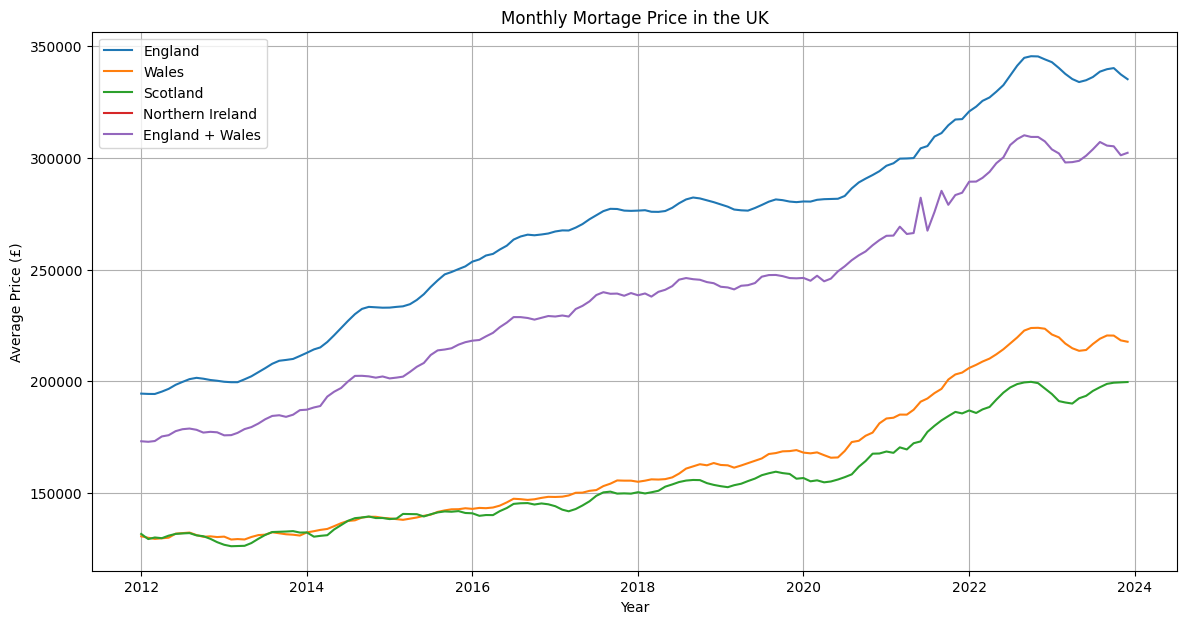

In [23]:
plt.figure(figsize=(14, 7))
plt.plot(mortagage_price_eng, label="England")
plt.plot(mortagage_price_wales, label="Wales")
plt.plot(mortagage_price_scot, label="Scotland")
plt.plot(mortagage_price_ni, label="Northern Ireland")
plt.plot(mortagage_price_e_w, label="England + Wales")
plt.title("Monthly Mortage Price in the UK")
plt.xlabel("Year")
plt.ylabel("Average Price (£)")
plt.legend()
plt.grid(True)

plt.show()


# Sales Volume

In [24]:
sales_vol_eng = eng_grouped_by_date["SalesVolume"].sum()
sales_vol_wales = wales_grouped_by_date["SalesVolume"].sum()
sales_vol_scot = scot_grouped_by_date["SalesVolume"].sum()
sales_vol_ni = ni_grouped_by_date["SalesVolume"].sum()
sales_vol_e_w = eng_wales_grouped_by_date["SalesVolume"].sum()


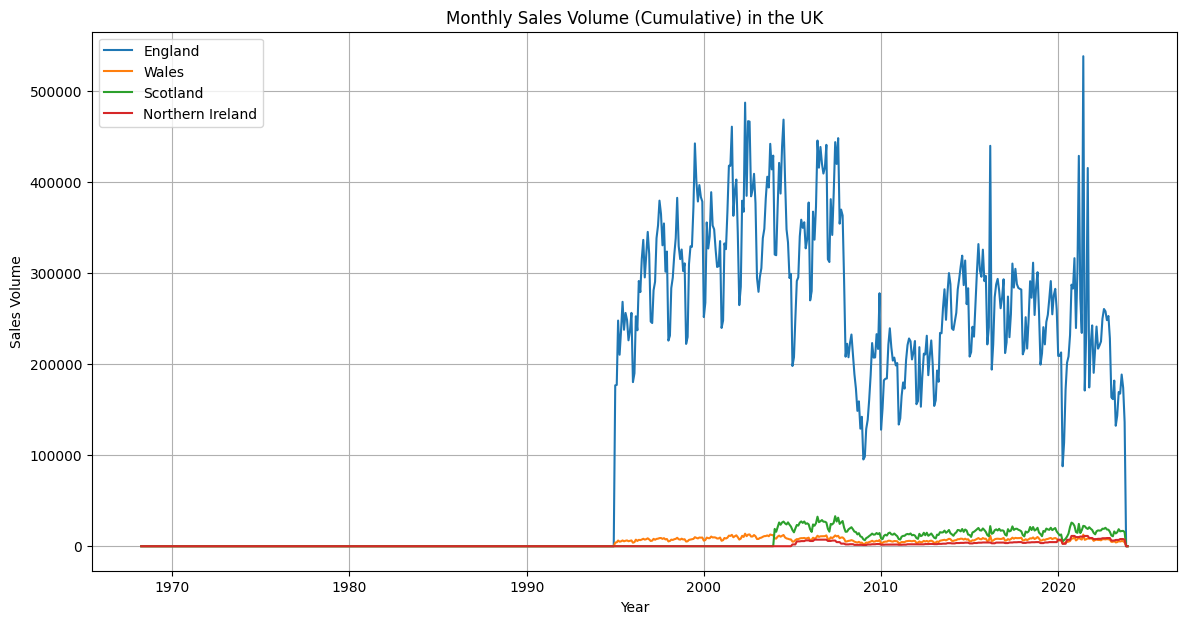

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(sales_vol_eng, label="England")
plt.plot(sales_vol_wales, label="Wales")
plt.plot(sales_vol_scot, label="Scotland")
plt.plot(sales_vol_ni, label="Northern Ireland")
#plt.plot(sales_vol_e_w, label="England + Wales")
plt.title("Monthly Sales Volume (Cumulative) in the UK")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend()
plt.grid(True)

plt.show()


In [26]:
sales_vol_avg_eng = eng_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_wales = wales_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_scot = scot_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_ni = ni_grouped_by_date["SalesVolume"].mean()
sales_vol_avg_e_w = eng_wales_grouped_by_date["SalesVolume"].mean()

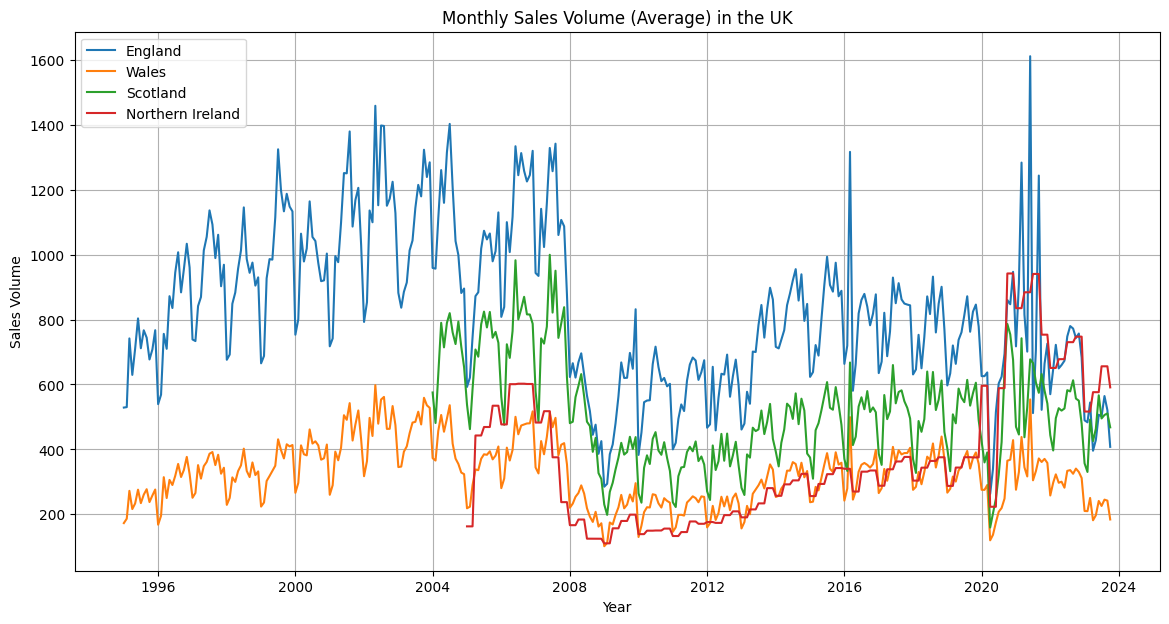

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(sales_vol_avg_eng, label="England")
plt.plot(sales_vol_avg_wales, label="Wales")
plt.plot(sales_vol_avg_scot, label="Scotland")
plt.plot(sales_vol_avg_ni, label="Northern Ireland")
#plt.plot(sales_vol_e_w, label="England + Wales")
plt.title("Monthly Sales Volume (Average) in the UK")
plt.xlabel("Year")
plt.ylabel("Sales Volume")
plt.legend()
plt.grid(True)

plt.show()


In [28]:
england_df.groupby('Date')["AveragePrice"].std()

Date
1968-04-01       576.244682
1968-05-01       576.244682
1968-06-01       576.244682
1968-07-01       597.413847
1968-08-01       597.413847
                  ...      
2023-08-01    144471.114294
2023-09-01    143581.060664
2023-10-01    144579.870822
2023-11-01    140328.169366
2023-12-01    136405.916460
Name: AveragePrice, Length: 669, dtype: float64

# England HPI File

In [29]:
# england_df = england_df.drop(columns=["index"])
# cols = england_df.columns.tolist()
# cols.remove("Country")
# cols.insert(1, "Country")
# # Reorder the DataFrame according to the new list of columns
# england_df = england_df[cols]

# # Save the modified DataFrame to a new CSV file
# england_df.to_csv("England-HPI.csv", index=False)

# Wales HPI File

In [30]:
# wales_df = wales_df.drop(columns=["index"])
# cols = wales_df.columns.tolist()
# cols.remove("Country")
# cols.insert(1, "Country")
# # Reorder the DataFrame according to the new list of columns
# wales_df = wales_df[cols]

# # Save the modified DataFrame to a new CSV file
# wales_df.to_csv("Wales-HPI.csv", index=False)

# Scotland HPI File

In [31]:
# scotland_df = scotland_df.drop(columns=["index"])
# cols = scotland_df.columns.tolist()
# cols.remove("Country")
# cols.insert(1, "Country")
# # Reorder the DataFrame according to the new list of columns
# scotland_df = scotland_df[cols]

# # Save the modified DataFrame to a new CSV file
# scotland_df.to_csv("Scotland-HPI.csv", index=False)

# Northern Ireland HPI File

In [32]:
# northern_ireland_df = northern_ireland_df.drop(columns=["index"])
# cols = northern_ireland_df.columns.tolist()
# cols.remove("Country")
# cols.insert(1, "Country")
# # Reorder the DataFrame according to the new list of columns
# northern_ireland_df = northern_ireland_df[cols]

# # Save the modified DataFrame to a new CSV file
# northern_ireland_df.to_csv("Northern_Ireland-HPI.csv", index=False)

In [33]:
# df.to_csv("Test.csv", index=False)

# Merging With PriceToEarnings csv

In [34]:
import numpy as np

In [36]:
price_to_earnings_df = pd.read_csv("/content/drive/MyDrive/ADS Datasets/price_earnings_eng_cym_wrangled.csv")

In [37]:
print(np.unique(price_to_earnings_df["Name"]))

['East' 'East Midlands' 'England ' 'England and Wales' 'London'
 'North East' 'North West' 'South East' 'South West' 'Wales'
 'West Midlands' 'Yorkshire and The Humber']


In [38]:
price_to_earnings_df["Year"] = pd.to_datetime(price_to_earnings_df["Year"])

In [39]:
price_to_earnings_df.rename(columns={"Code": "AreaCode", "Year": "Date"}, inplace=True)

In [40]:
price_to_earnings_df.drop("Name", axis=1, inplace=True)

In [41]:
merged_data = pd.merge(df, price_to_earnings_df, on=["Date", "AreaCode"], how="left")

In [42]:
merged_data.head()

,Date,RegionName,AreaCode,AveragePrice,Index,1m%Change,12m%Change,SalesVolume,DetachedPrice,DetachedIndex,...,Old1m%Change,Old12m%Change,OldSalesVolume,Country,Median_price,Low_q_Median_price,Median_earning,Low_q_Median_earning,price_to_earning,Low_q_price_to_earning
0,2004-01-01,Aberdeenshire,S12000034,81693.66964,40.864214,NaN,NaN,388.0,122490.0641,43.610982,...,NaN,NaN,285.0,Scotland,NaN,NaN,NaN,NaN,NaN,NaN
1,2004-02-01,Aberdeenshire,S12000034,81678.76231,40.856757,-0.018248,NaN,326.0,121280.8840,43.180469,...,-0.097053,NaN,219.0,Scotland,NaN,NaN,NaN,NaN,NaN,NaN
2,2004-03-01,Aberdeenshire,S12000034,83525.09702,41.780317,2.260483,NaN,453.0,123395.4269,43.933325,...,2.393549,NaN,313.0,Scotland,NaN,NaN,NaN,NaN,NaN,NaN
3,2004-04-01,Aberdeenshire,S12000034,84333.67900,42.184780,0.968071,NaN,571.0,122334.0258,43.555427,...,1.327755,NaN,391.0,Scotland,NaN,NaN,NaN,NaN,NaN,NaN
4,2004-05-01,Aberdeenshire,S12000034,86379.95396,43.208353,2.426403,NaN,502.0,124498.8747,44.326193,...,2.641235,NaN,335.0,Scotland,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
filtered_df = merged_data[merged_data["Median_price"].notna()]
print(len(np.unique(merged_data["AreaCode"])))
print(len(np.unique(filtered_df["AreaCode"])))

405
12
